<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/MLP_B%C3%A1sica_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = '/content/data.csv'  # Cambia 'ruta_del_archivo' por la ubicación real
data = pd.read_csv(file_path)

# Eliminar columnas innecesarias y realizar limpieza inicial
data_cleaned = data.drop(columns=["Unnamed: 32", "id"], errors='ignore')

# Estadísticas descriptivas
stats_summary = data_cleaned.describe()

# Función para detectar valores atípicos mediante el método del rango intercuartílico (IQR)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar valores atípicos en las columnas numéricas
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
outliers_summary = {col: detect_outliers_iqr(data_cleaned, col).shape[0] for col in numeric_cols}

# Graficar la distribución de las principales características
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols[:9], 1):  # Graficar las primeras 9 columnas
    plt.subplot(3, 3, i)
    sns.boxplot(data=data_cleaned, x=col)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Resumen
print("Estadísticas descriptivas:")
print(stats_summary)

print("\nNúmero de valores atípicos detectados por columna:")
print(outliers_summary)


# Exploración y preprocesamiento de datos:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = data_cleaned.drop(columns=["diagnosis"])  # Características
y = data_cleaned["diagnosis"]                 # Variable objetivo

# Convertir la variable objetivo en binaria (Maligno = 1, Benigno = 0)
y = y.map({'M': 1, 'B': 0})

# Normalización de las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

# Resumen de los conjuntos de datos
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 455 muestras
Conjunto de prueba: 114 muestras


# Implementación de la MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la arquitectura de la MLP
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 32 neuronas y ReLU
    Dense(1, activation='sigmoid')                                  # Capa de salida con una neurona y activación sigmoide
])

# Compilar el modelo
model.compile(
    optimizer='adam',                       # Optimizador Adam
    loss='binary_crossentropy',             # Función de pérdida para clasificación binaria
    metrics=['accuracy']                    # Métrica de precisión
)

# Resumen de la red
model.summary()

# Entrenar la MLP
history = model.fit(
    X_train, y_train,                       # Datos de entrenamiento
    validation_data=(X_test, y_test),       # Datos de prueba para validación
    epochs=50,                              # Número de épocas
    batch_size=32,                          # Tamaño del lote
    verbose=1                               # Mostrar progreso
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4473 - loss: 0.8540 - val_accuracy: 0.7018 - val_loss: 0.5936
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7838 - loss: 0.5135 - val_accuracy: 0.8772 - val_loss: 0.3908
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.3746 - val_accuracy: 0.9211 - val_loss: 0.2867
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9146 - loss: 0.2869 - val_accuracy: 0.9561 - val_loss: 0.2286
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9425 - loss: 0.2227 - val_accuracy: 0.9649 - val_loss: 0.1929
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9318 - loss: 0.2192 - val_accuracy: 0.9737 - val_loss: 0.1681
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9514 - loss: 0.1802 - val_accuracy: 0.9737 - val_loss: 0.1502
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9546 - loss: 0.1697 - val_accuracy: 0.9912 - val_loss

# Entrenamiento del modelo:

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9972 - loss: 0.0375 - val_accuracy: 0.9825 - val_loss: 0.0606
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9949 - loss: 0.0382 - val_accuracy: 0.9825 - val_loss: 0.0621
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0514 - val_accuracy: 0.9825 - val_loss: 0.0624
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9886 - loss: 0.0346 - val_accuracy: 0.9825 - val_loss: 0.0629
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0410 - val_accuracy: 0.9825 - val_loss: 0.0625
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9932 - loss: 0.0394 - val_accuracy: 0.9825 - val_loss: 0.0629
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.0283 - val_accuracy: 0.9825 - val_loss: 0.0631
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9925 - loss: 0.0447 - val_accuracy: 0.9825 - val_loss:

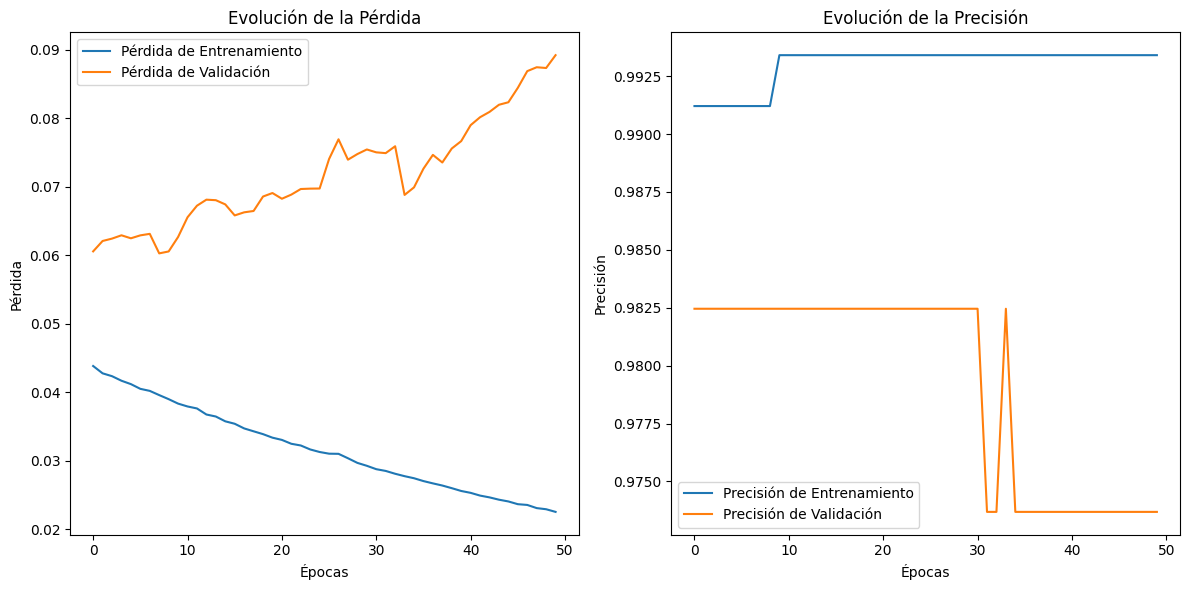

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo
history = model.fit(
    X_train, y_train,                       # Datos de entrenamiento
    validation_data=(X_test, y_test),       # Datos de prueba para validación
    epochs=50,                              # Número de épocas
    batch_size=32,                          # Tamaño del lote
    verbose=1                               # Mostrar progreso
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

# Visualizar las curvas de aprendizaje
def plot_learning_curves(history):
    # Graficar pérdida
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Evolución de la Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Graficar precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Evolución de la Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_learning_curves(history)


# Evaluación del modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)  # Probabilidades predichas
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

# Calcular métricas de clasificación
report = classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno'])

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benigno', 'Maligno'])

# Mostrar resultados
print("Reporte de clasificación:")
print(report)

print("\nMatriz de Confusión:")
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

     Benigno       0.96      1.00      0.98        72
     Maligno       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Matriz de Confusión:
